In [34]:
import glScale
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [35]:
#Open data
df = pd.read_csv('./datasets/iris.csv',header=None)

In [36]:
df.columns =['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)','label']

In [37]:
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

         label  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa

In [59]:
labels = df['label'].unique()

In [60]:
labels

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [38]:
df.shape

(150, 5)

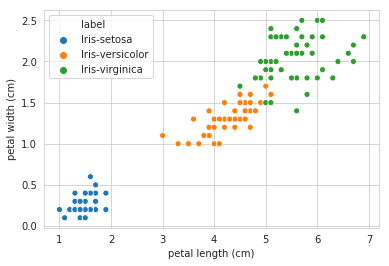

In [177]:
sns.scatterplot(data=df,x =df.columns[2],y=df.columns[3],hue='label')

In [40]:
from sklearn.cluster import KMeans

In [120]:
km = KMeans(n_clusters=3)
km.fit(df[df.columns[0:4]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [121]:
km.labels_.shape

(150,)

In [122]:
def map_kmeans(y,y_hat):
    """Recieves real labels y (*pd.Series) and predicted labels (y_hat = kmeans.labels_)"""
    labels = y.unique()
    mapping = {}
    for label in labels:
        label_n = 0
        max_label = {}
        for i in range(len(labels)):
            n_match = np.sum([(y_hat==i) & (y==label)])
            if  n_match > label_n:
                label_n = n_match
                max_label = {i:label}
        mapping.update(max_label)
    return mapping
            

In [123]:
mapping = map_kmeans(df['label'],km.labels_)

In [124]:
final_labels = [mapping[label] for label in km.labels_]

In [170]:
acc = np.sum(df['label']==final_labels)/df.shape[0]
print('Accuracy: ',acc)

Accuracy:  0.8933333333333333


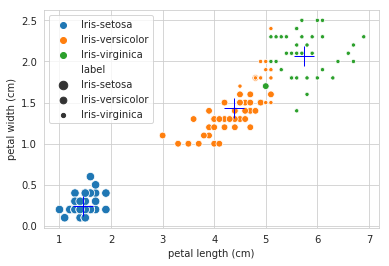

In [178]:
sns.scatterplot(data=df,x=df.columns[2],y=df.columns[3],hue=final_labels,size='label')
for i in range(len(labels)):
#i=0
    plt.plot(km.cluster_centers_[i][2],km.cluster_centers_[i][3],color='blue',marker='+',markersize='20')
plt.show()

## Z-score Standardization

In [127]:
from sklearn.preprocessing import StandardScaler

In [128]:
cols=df.columns[0:4]
std_scaler = StandardScaler()
df_std = pd.DataFrame(std_scaler.fit_transform(df[cols]))

In [129]:
df_std['label'] = df['label']
df_std.columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)','label']

In [130]:
df_std.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -0.900681          1.032057          -1.341272         -1.312977   
1          -1.143017         -0.124958          -1.341272         -1.312977   
2          -1.385353          0.337848          -1.398138         -1.312977   
3          -1.506521          0.106445          -1.284407         -1.312977   
4          -1.021849          1.263460          -1.341272         -1.312977   

         label  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa

In [131]:
km_std = KMeans(n_clusters=3)
km_std.fit(df_std[df_std.columns[0:4]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [132]:
mapping_std = map_kmeans(df_std['label'],km_std.labels_)
final_labels_std = [mapping_std[label] for label in km_std.labels_]

In [171]:
acc_std = np.sum(df_std['label']==final_labels_std)/df_std.shape[0]
print('Accuracy with Standardization: ',acc_std)

Accuracy with Standardization:  0.8333333333333334


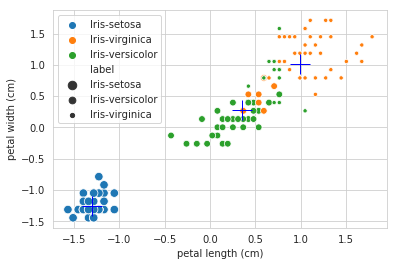

In [179]:
sns.scatterplot(data=df_std,x=df_std.columns[2],y=df_std.columns[3],hue=final_labels_std,size='label')
for i in range(len(labels)):
#i=0
    plt.plot(km_std.cluster_centers_[i][2],km_std.cluster_centers_[i][3],color='blue',marker='+',markersize='20')
plt.show()

## GL Scale

In [161]:
scale_gls = glScale.glScale(epochs=200,learning_rate=0.01,verbose_frequence=50,batch=5,sampled=False)

Epoch: 50 MSError: 0.0051961853
Epoch: 100 MSError: 0.002394616
Epoch: 150 MSError: 0.0013537505
Epoch: 200 MSError: 0.0009267807


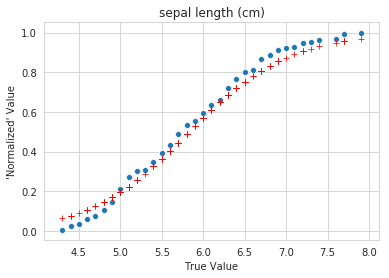

Epoch: 50 MSError: 0.006469582
Epoch: 100 MSError: 0.0026303076
Epoch: 150 MSError: 0.0013884966
Epoch: 200 MSError: 0.00090819923


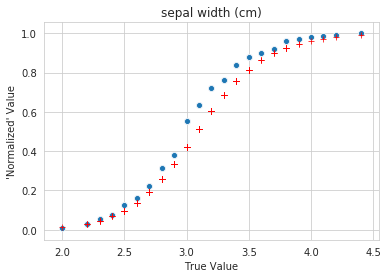

Epoch: 50 MSError: 0.008187794
Epoch: 100 MSError: 0.0064155622
Epoch: 150 MSError: 0.0061528613
Epoch: 200 MSError: 0.006314543


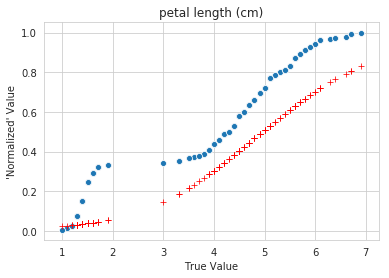

Epoch: 50 MSError: 0.003975911
Epoch: 100 MSError: 0.0033894277
Epoch: 150 MSError: 0.0035119501
Epoch: 200 MSError: 0.003792368


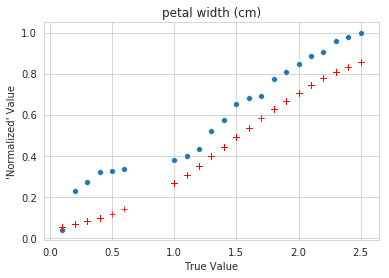

In [162]:
cols=df.columns[0:4]
df_gls = pd.DataFrame()
for col in cols:
    df_gls[col] = scale_gls.fit_transform(df[col])
    plt.figure() 
    sns.set_style('whitegrid')
    sns.scatterplot(df[col],scale_gls.cdf)
    sns.scatterplot(df[col],df_gls[col],marker='+',color='r')
    plt.title(col)
    plt.xlabel('True Value')
    plt.ylabel("'Normalized' Value")
    plt.show()

In [163]:
df_gls['label']=df['label']

In [164]:
km_gls = KMeans(n_clusters=3)
km_gls.fit(df_gls[df_gls.columns[0:4]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [165]:
mapping_gls = map_kmeans(df_gls['label'],km_gls.labels_)
final_labels_gls = [mapping_gls[label] for label in km_gls.labels_]

In [172]:
acc_gls = np.sum(df_gls['label']==final_labels_gls)/df_gls.shape[0]
print('Accuracy with GLS: ',acc_gls)

Accuracy with GLS:  0.8533333333333334


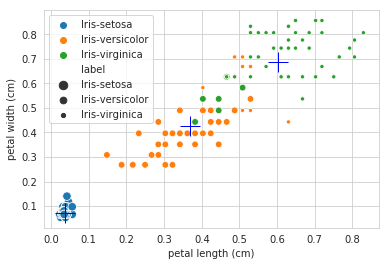

In [180]:
sns.scatterplot(data=df_gls,x=df_gls.columns[2],y=df_gls.columns[3],hue=final_labels_gls,size='label')
for i in range(len(labels)):
#i=0
    plt.plot(km_gls.cluster_centers_[i][2],km_gls.cluster_centers_[i][3],color='blue',marker='+',markersize='20')
plt.show()
